In [1]:
import rectification as rec
from sklearn.datasets import load_sample_images
import matplotlib.pyplot as plt
import cv2


panel = imread(r'image.jpg')
plt.imshow(temple)

NameError: name 'imread' is not defined

In [11]:
edgelets1 = rec.compute_edgelets(panel)

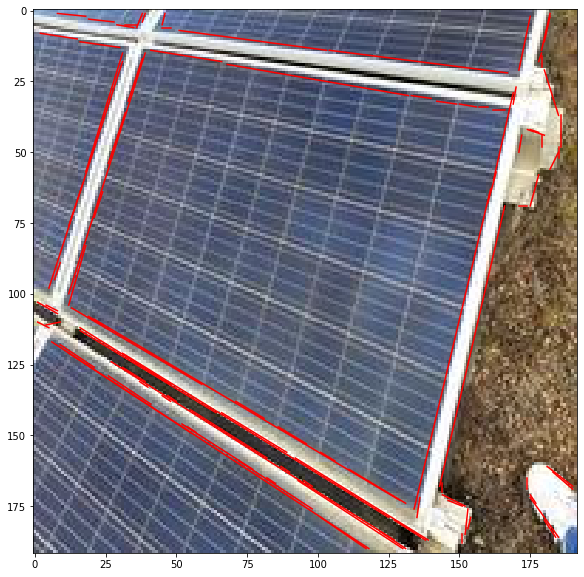

In [13]:
rec.vis_edgelets(panel, edgelets1) # Visualize the edgelets

C:\Users\ckw-haec\code\photovoltaic_images\notebooks\rectification.py:121: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos(np.abs(cosine_theta))
C:\Users\ckw-haec\code\photovoltaic_images\notebooks\rectification.py:297: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  est_model = np.linalg.lstsq(a, b)[0]


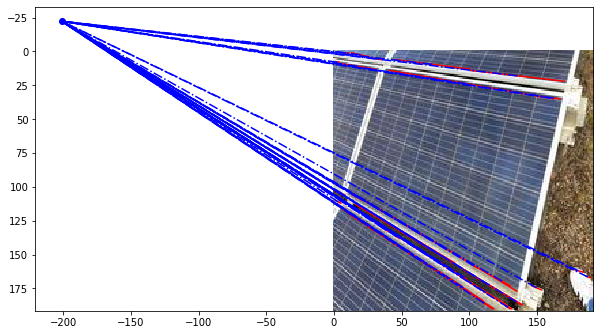

In [15]:
vp1 = rec.ransac_vanishing_point(edgelets1, num_ransac_iter=2000, 
                             threshold_inlier=5)
vp1 = rec.reestimate_model(vp1, edgelets1, threshold_reestimate=5)
rec.vis_model(panel, vp1) # Visualize the vanishing point model

C:\Users\ckw-haec\code\photovoltaic_images\notebooks\rectification.py:121: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos(np.abs(cosine_theta))
C:\Users\ckw-haec\code\photovoltaic_images\notebooks\rectification.py:297: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  est_model = np.linalg.lstsq(a, b)[0]


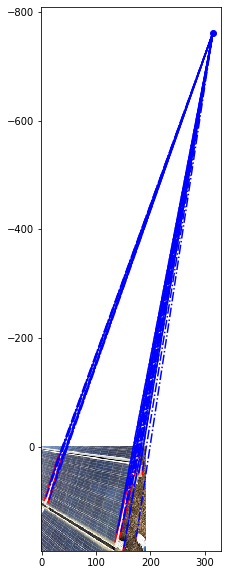

In [16]:
edgelets2 = rec.remove_inliers(vp1, edgelets1, 10)
vp2 = rec.ransac_vanishing_point(edgelets2, num_ransac_iter=2000,
                             threshold_inlier=5)
vp2 = rec.reestimate_model(vp2, edgelets2, threshold_reestimate=5)
rec.vis_model(panel, vp2) # Visualize the vanishing point model

In [22]:
warped_img = rec.compute_homography_and_warp(panel, vp1, vp2)
warped_img.shape

(134, 104, 3)

In [28]:
img = cv2.resize(warped_img, (192,192))

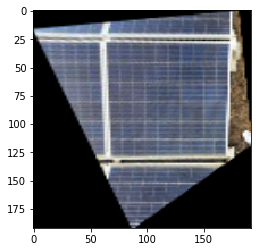

In [30]:
plt.imshow(img)